In [1]:
import math
import random
import matplotlib.pyplot as plt
import tqdm

class DBSCAN(object):

    STATUS_UNVISITED = 'unvisited'
    STATUS_VISITED = 'visited'

    STATUS_GROUP = 1
    STATUS_NOGROUP = 0

    data = dict()

    def __init__(self, e, minPts):
        """
        e 最小距离
        minPts 最少样本数量
        """
        self.e = e
        self.minPts = minPts

    def nearby(self, id):
        nearby_points = list()
        for link_id in range(len(self.scores[id])):
            if self.scores[id][link_id] <= self.e:
                nearby_points.append(link_id)

        return nearby_points

    def visit_nearby_points(self, points, group):
        for id in points:
            if self.data[id]['is_visited'] == self.STATUS_VISITED \
                    and self.data[id]['is_group'] == self.STATUS_GROUP:
                continue
            self.data[id]['is_visited'] = self.STATUS_VISITED

            if self.data[id]['is_group'] == self.STATUS_NOGROUP:
                group.append(id)
                self.data[id]['is_group'] = self.STATUS_GROUP

            nearby_points = self.nearby(id)
            return nearby_points  
        
    def fit(self, data_set, scores):
        self.scores = scores
        groups = list()

        for index, item in enumerate(data_set):
           self.data[index] = {'id': index,
                                'is_visited': self.STATUS_UNVISITED,
                                'is_group': self.STATUS_NOGROUP
                                }

        for id in self.data:
            # print(id)
            if self.data[id]['is_visited'] == self.STATUS_VISITED:
                continue
            self.data[id]['is_visited'] = self.STATUS_VISITED
            candidates=list()
            candidates.append(id)
            group = list()
            while len(candidates) > 0:
                now= candidates.pop(0)

                if self.data[now]['is_visited'] == self.STATUS_VISITED and self.data[now]['is_group'] == self.STATUS_GROUP:
                    continue
                self.data[now]['is_visited'] = self.STATUS_VISITED

                if self.data[now]['is_group'] == self.STATUS_NOGROUP:
                    group.append(now)
                    self.data[now]['is_group'] = self.STATUS_GROUP

                nearby_points = self.nearby(now)
                if len(nearby_points) >= self.minPts:
                    for p in nearby_points:
                        if self.data[p]['is_visited'] == self.STATUS_VISITED:
                            continue
                        elif self.data[p]['is_group'] == self.STATUS_GROUP:
                            continue
                        elif p in candidates:
                            continue
                        else:
                            candidates.append(p)
            if len(group) > 0:
                print(id)
                groups.append(group)
   
        
        for id in self.data:
            if self.data[id]['is_group'] == self.STATUS_NOGROUP:
                groups.append([id])

        return groups
    


def init_data(num, min, max):
    data = []
    for i in range(num):
        data.append([random.randint(min, max), random.randint(min, max)])

    return data


def mat_score(data_set):
    score = dict()
    for i in range(len(data_set)):
        score[i] = dict()

    for i in range(len(data_set) - 1):
        j = i + 1
        while j < len(data_set):
            score[i][j] = math.sqrt(abs(data_set[i][0] - data_set[j][0]) ** 2 + abs(data_set[i][1] - data_set[j][1]) ** 2)
            score[j][i] = score[i][j]
            j += 1

    return score


# def show_cluster(data_set, groups):
#     plt.title(u'DBSCAN')
#     mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']
#     for index, group in enumerate(groups):
#         for i in group:
#             plt.plot(data_set[i][0], data_set[i][1], mark[index])

#     plt.xlim(0.0, 100)
#     plt.ylim(0.0, 100)
#     plt.show()



In [2]:
import numpy as np
dist = np.load('/data/wuxiao/score.npy')
Y = np.load('./datasets/2demb.npy')
print(max(dist[0]))
print(np.mean(dist[0]))

92.3456039428711
45.51266753147427


In [3]:
model = DBSCAN(2,40)
cluster = model.fit(Y, dist)
cluster = np.array(cluster) 
np.save('dbscan', cluster)


0
1
2
3
6
11
12
14
15
16
17
21
24
25
26
27
29
34
37
38
39
40
42
43
47
50
51
54
62
66
68
78
82
86
90
93
98
102
104
108
118
137
138
146
150
154
155
159
167
170
174
178
187
207
209
212
221
225
233
238
252
254
284
320
327
330
334
338
340
348
349
357
360
368
372
374
375
376
392
402
406
412
413
415
437
447
448
449
452
466
467
473
474
475
477
481
484
505
520
521
547
553
568
574
579
580
590
597
605
607
609
616
618
624
626
634
637
642
648
658
662
663
673
688
704
719
725
733
741
743
749
760
789
810
840
847
853
881
893
899
902
909
926
964
998
1010
1022
1024
1065
1068
1074
1090
1098
1103
1120
1125
1132
1133
1149
1150
1171
1175
1182
1183
1191
1199
1206
1221
1265
1276
1280
1301
1310
1311
1313
1320
1334
1343
1357
1458
1468
1469
1472
1473
1476
1479
1497
1501
1505
1519
1527
1576
1580
1586
1589
1592
1602
1611
1649
1653
1657
1667
1669
1686
1693
1708
1711
1727
1758
1764
1784
1785
1813
1816
1817
1831
1838
1846
1871
1897
1914
1915
1921
1923
1925
1953
1957
2013
2015
2016
2029
2038
2045
2048
2083
2110
2126
21

/tmp/ipykernel_2532946/3110398980.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  cluster = np.array(cluster)


[list([0, 678, 971, 1108, 4463, 4945, 4973, 5086, 5117, 5139, 5283, 5781, 8082, 8372, 11178, 11524, 12012, 13555, 14006, 14291, 15832, 16055, 16498, 17074, 17118, 17409, 17973, 18454, 18910, 20371, 22611, 23183, 23469, 24751, 26216, 27388, 27502, 29924, 31454, 32398, 32408, 32562, 32784, 33487, 279, 2155, 2182, 4572, 6811, 7227, 7622, 8789, 12810, 14692, 17296, 19570, 21439, 21780, 21904, 23153, 24159, 24332, 26155, 27278, 30779, 32014, 32025, 799, 2718, 7106, 7815, 8895, 8948, 9055, 9785, 10502, 13411, 13787, 14482, 15251, 16196, 18920, 21469, 21621, 21837, 24685, 25686, 28653, 31649, 10315, 12659, 16713, 17665, 18066, 601, 685, 775, 1099, 9971, 14238, 14524, 15270, 19894, 23768, 29842, 31218, 241, 17040, 18178, 19373, 31123, 26392, 12671, 14701, 25027, 22596, 3200, 4443, 8589, 25728, 31832, 14749, 30981, 1597, 20585, 25522, 117, 2204, 2964, 3178, 3891, 4316, 5145, 5858, 6107, 7634, 8573, 9531, 10057, 10799, 12622, 16887, 21064, 21346, 21390, 22266, 25976, 26628, 27433, 27866, 28405, 

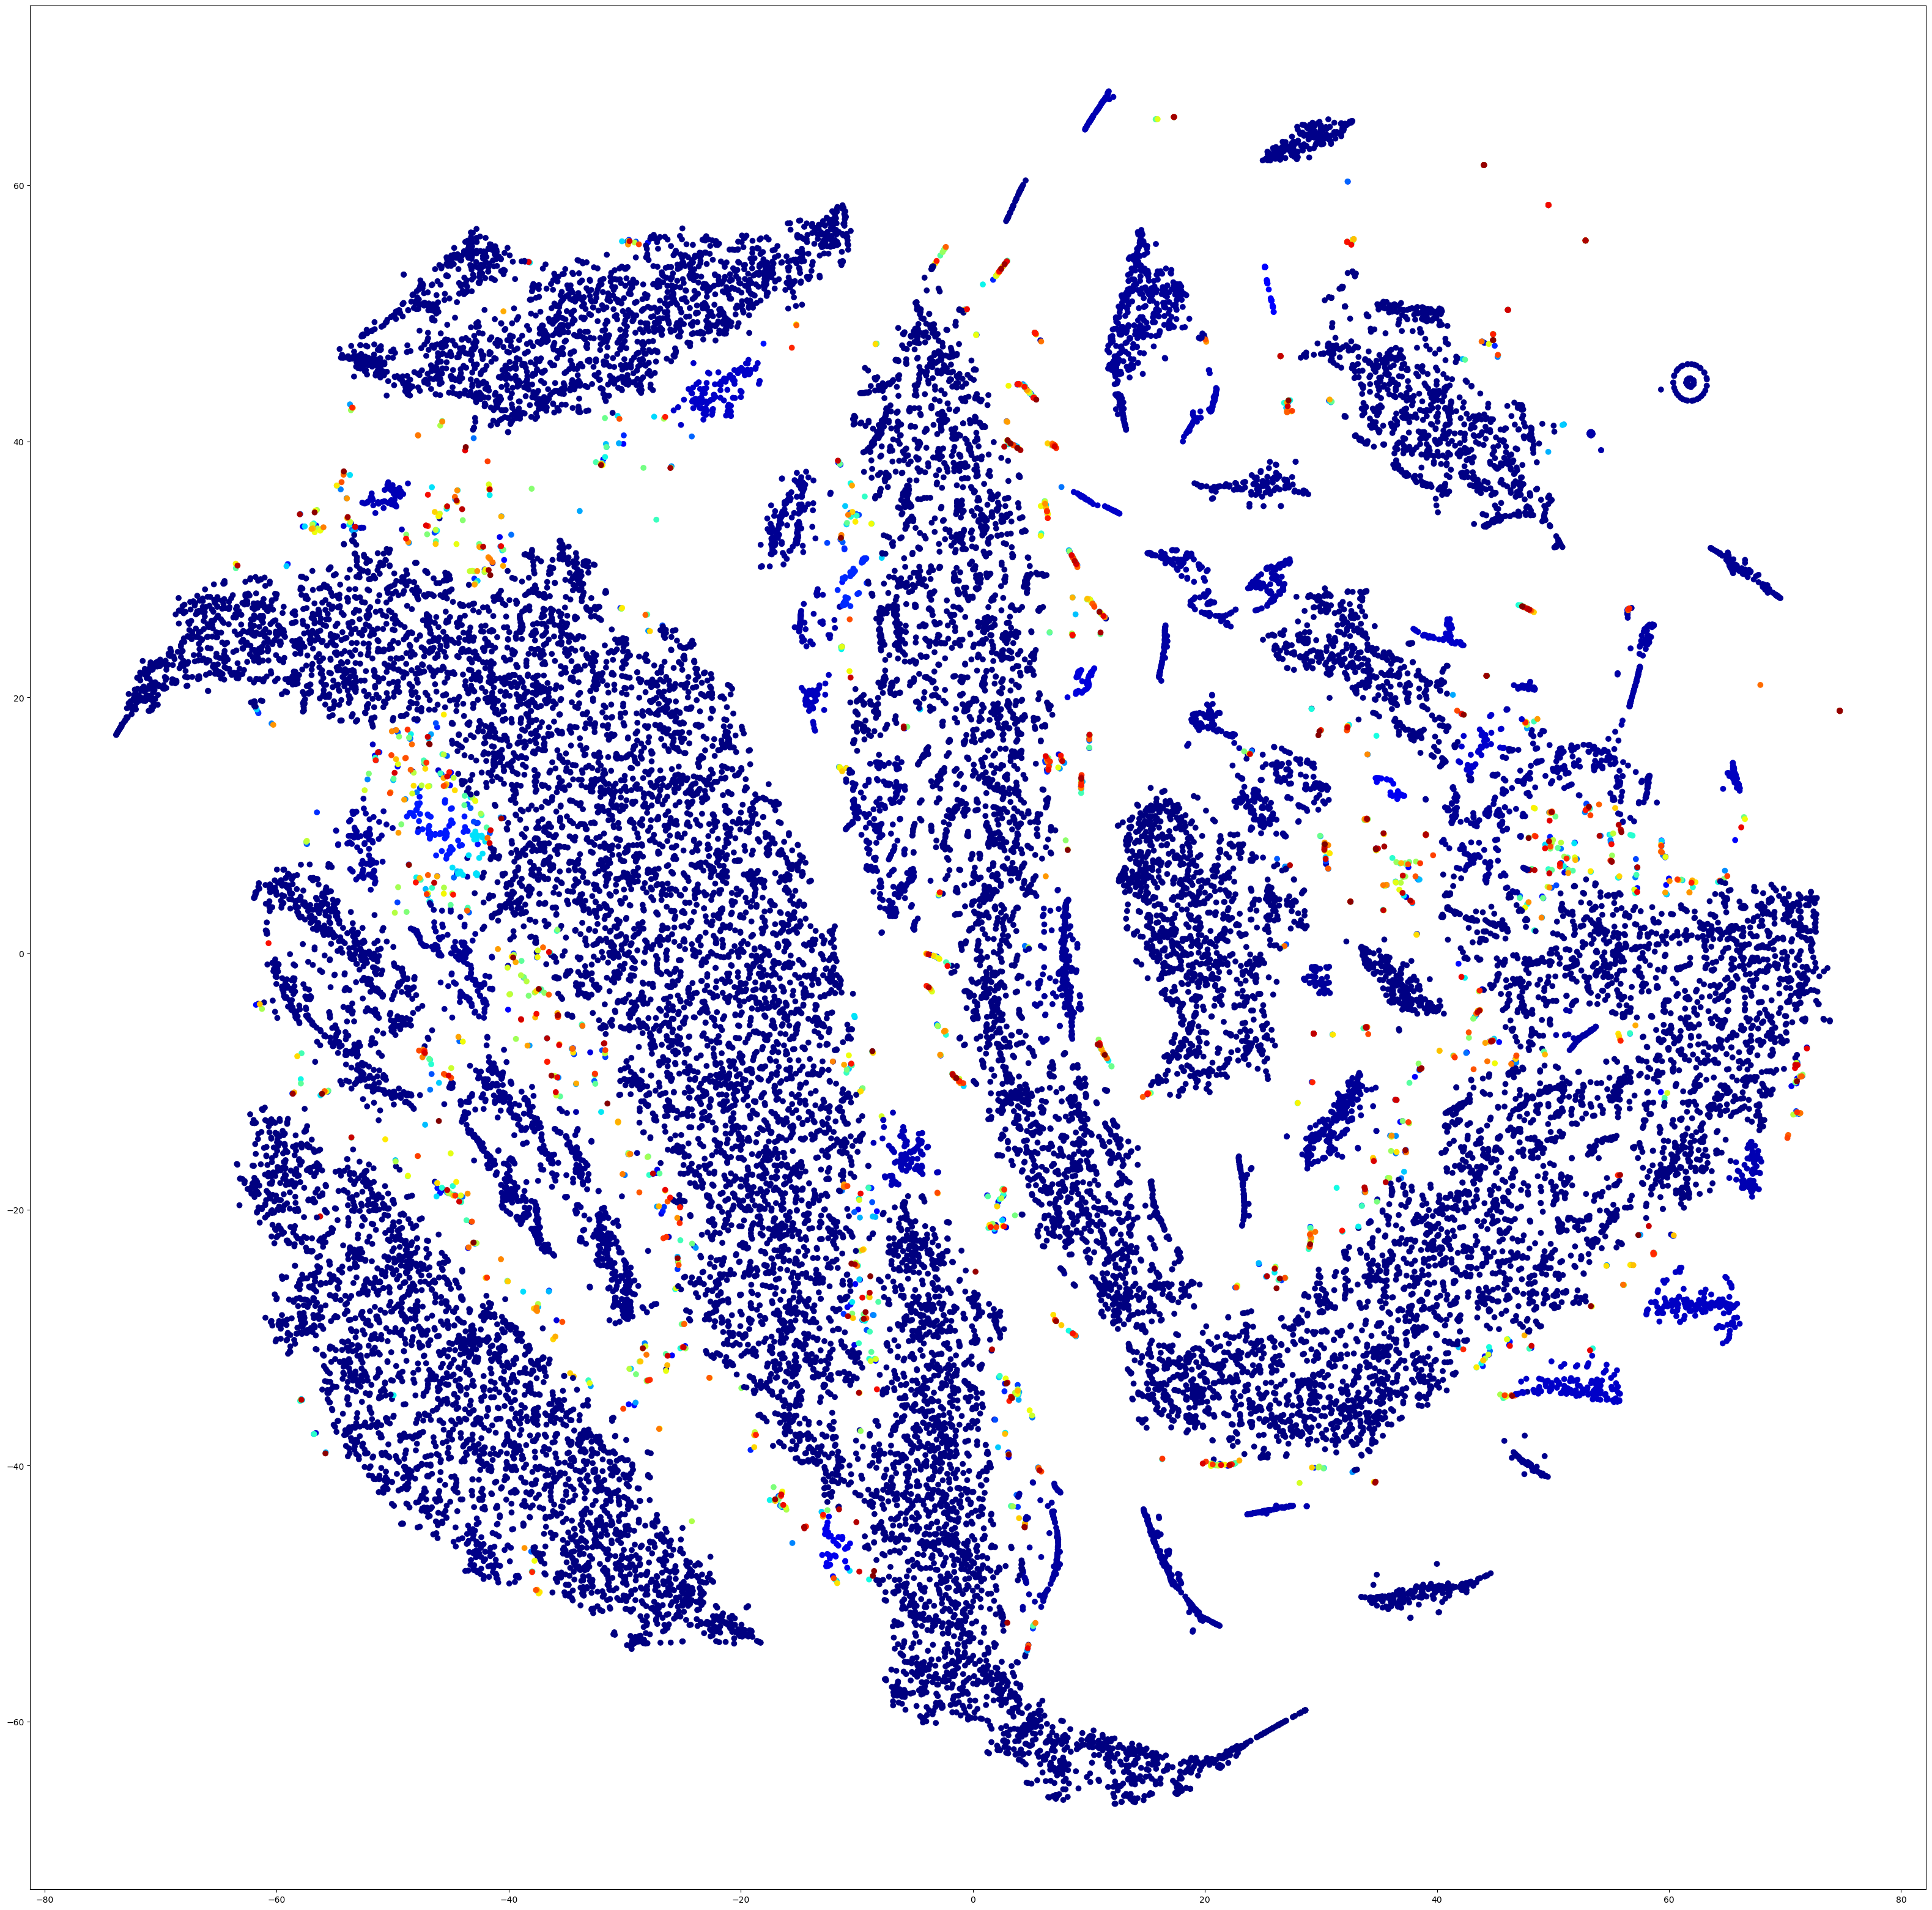

In [6]:
# np.load("dbscan.npy")
print(cluster)
print(len(cluster))
labels=np.zeros(len(dist[0]),dtype=int)
index = 0
for i in range(len(cluster)):
    for j in range(len(cluster[i])):
        # print(cluster[i][j])
        labels[cluster[i][j]]=i
print(labels>0)
import matplotlib.pyplot as plt
import matplotlib

plt.figure(figsize=(40,40))
plt.scatter(Y[:,0], Y[:,1], c=labels, cmap=matplotlib.cm.jet)